<a href="https://colab.research.google.com/github/jaidatta71/ML---Berkeley/blob/main/PCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from sklearn.datasets import make_blobs, make_circles, make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d

In [5]:
#        make_blobs(n_samples=n_samples, random_state=8)
X1, _ = make_blobs(n_samples=1500, random_state=111)

NameError: name 'Y1' is not defined

In [25]:
X1, _ = make_blobs(n_samples=20, random_state=42)

In [30]:
df = pd.DataFrame(X1, columns=['X1','X2'])
df.info()
centroids = df.sample(3, random_state = 11).reset_index(drop = True)
centroids

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      20 non-null     float64
 1   X2      20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


,X1,X2
0,-2.267235,7.101006
1,-8.207813,-6.683248
2,-6.670764,-8.839780


In [36]:
centroids.iloc[1, :2].values


array([-8.20781324, -6.68324836])

In [6]:
from scipy.linalg import svd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces, fetch_california_housing
from sklearn.datasets import make_regression
from sklearn.datasets import fetch_openml

In [9]:
faces_data = pd.read_csv('drive/MyDrive/faces.csv')
#pd.read_csv('drive/MyDrive/colab_activity_4_1_starter/data/site.csv')
cali_housing = fetch_california_housing(return_X_y=False, as_frame=True, data_home='data')
df = cali_housing.frame.head(5)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


(64, 64)


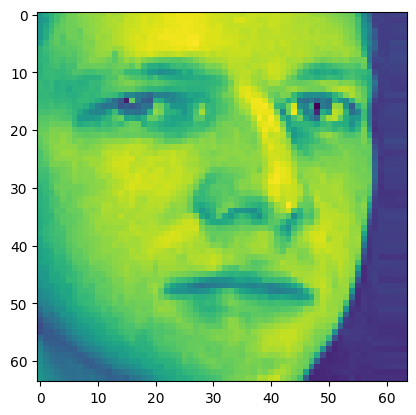

In [33]:
image = faces_data.iloc[4].values.reshape(64, 64)
print(image.shape)
plt.imshow(image)

### PCA ###
1. standardize the data
2. perform SVD
3. select how many components to keep

In [25]:
### 1st Step
def svd_norm(X):
    x_norm =( X - X.mean())/X.std()
    U, sigma, VT = svd(x_norm, full_matrices=False)
    Sigma = np.diag(sigma)
    return U, Sigma, VT

U, Sigma, VT = svd_norm(image)
#U, Sigma, VT = svd_norm(df)
print(U.shape, Sigma.shape, VT.shape)
print(type(Sigma))

(64, 64) (64, 64) (64, 64)
<class 'numpy.ndarray'>


 Apply the `svd_norm` function you defined in Problem 1 to `image` and assign the result to `U`, `Sigma`, and `VT`.
- Use the `np.copy` function with argument `Sigma` to make a copy of the $\Sigma$ matrix and assign  the result to `Sigma_copy`.
- Set all but the first 5 singular values of `Sigma_copy` (first 25 values - 5x5 matrix) to zero.
-  Reconstruct the original image by multiplying $U \Sigma_{copy} VT$ with the `@` operator and assign the result to `simpler_image`.

(64, 64)


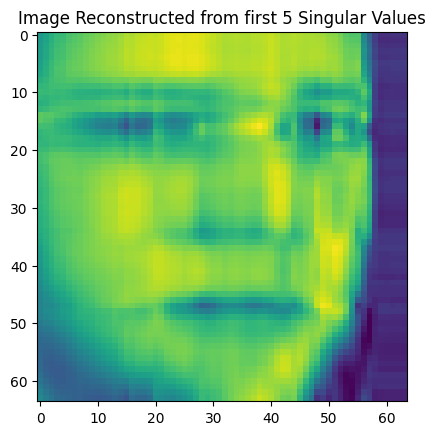

In [29]:
Sigma_copy = None
simpler_image = None

U, Sigma, VT = svd_norm(image)
Sigma_copy = np.copy(Sigma)
Sigma_copy[5:, 5:] = 0
simpler_image = U@Sigma_copy@VT

print(simpler_image.shape)
plt.imshow(simpler_image)
plt.title('Image Reconstructed from first 5 Singular Values');

### PCA for df (housing data)
Complete the function `pca` below according to the instructions below:

- The function takes two arguments, `X` and `r` where `X` is an array or DataFrame and `r` is a dimension to project the data down into.
- The function should scale the array `X` using its mean and standard deviation and assign the result to ` x_norm`.
- The function should use the `svd` function to factor `x_norm` using `full_matrices` equal to `False` and assign the result to `U`, `sigma`, and `VT`.
- The function should use `np.diag()` to define a diagonal matrix with the singular values on the main diagonal and assign the result to `Sigma`.
- The function should extract all the rows and the first `r` columns of `U` and assign the result to `Ur`.
- The function should extract the first `r` rows and columns of `Sigma` and assign the result to `Sigma_r`.
- The function should returns a DataFrame of shape `(N, r)` with columns labeled `pca_1`, `pca_2`, ..., `pca_r`. To achieve this use the code `pd.DataFrame(Ur @ Sigma_r, columns = [f'pca_{i}' for i in range(1, r + 1)])`


x_norm = U @ Sigma @ VT
 - You can verify by using np.allclose(). If the value returned is TRUE, they are same. np.allclose(x_norm, U @ Sigma @ VT)
 -  U, sigma, VT = svd(x_norm, full_matrices=False)
 -  Sigma = np.diag(sigma)
 -  V = VT.T

In [3]:
U, Sigma, VT = svd_norm(df)

# Answer check
print(type(U))
print(df.shape, Sigma.shape)

def pca(X, r):
    x_norm =( X - X.mean())/X.std()
    U, sigma, VT = svd(x_norm, full_matrices=False)
    Sigma = np.diag(sigma)
    Ur = U[:, :r]
    Sigma_r = Sigma[:r, :r]
    return pd.DataFrame(Ur @ Sigma_r, columns = [f'pca_{i}' for i in range(1, r + 1)])

### END SOLUTION

# Answer check
XT = pca(df, r = 2)
print(XT.shape)
print(type(XT))

NameError: name 'svd_norm' is not defined

<class 'numpy.ndarray'>


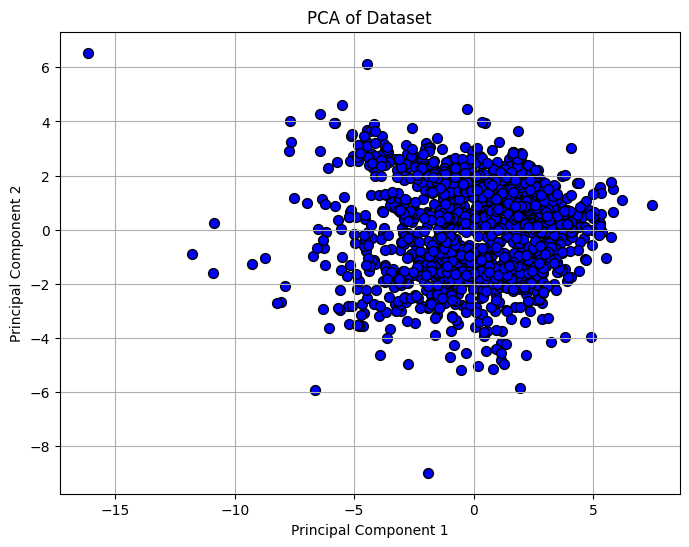

In [106]:
# Plot the PCA-transformed version of the data

#XT=XT.to_numpy()
print(type(XT))

plt.figure(figsize=(8, 6))
plt.scatter(XT[:, 0], XT[:, 1], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()


# 2nd Example on PCA. But Number of PCAs required are More

---



In [81]:
housing = fetch_openml(name="house_prices", as_frame=True, data_home='data')

#select numeric data and drop missing values
df = housing.frame.select_dtypes(['float', 'int']).dropna(axis = 1)#.select_dtypes(['int', 'float'])

# Scale the `df` data using its mean and standard deviation so that it is ready for SVD.
df_scaled = (df - df.mean())/df.std()

# Using the scaled data, extract the singular values from the data using the `scipy.linalg` function `svd`
U, sigma, VT = svd(df_scaled)
print(type(sigma))
print(sigma.shape)

# Percent Variance Explained
percent_variance_explained = sigma/sigma.sum()

print(percent_variance_explained.shape)
print(percent_variance_explained.sum())
# how many principal components are necessary to retain up to 80% of the explained variance
print(int((np.cumsum(percent_variance_explained) < .8).sum()))

cumulative_variance = np.cumsum(percent_variance_explained)
print(f"Cumulative explained variance: {cumulative_variance}")

<class 'numpy.ndarray'>
(35,)
(35,)
1.0000000000000002
21
Cumulative explained variance: [0.08757692 0.14576166 0.19370719 0.23970772 0.27948317 0.31513422
 0.35026271 0.38473414 0.41867326 0.45244718 0.48582951 0.51854891
 0.5511652  0.58337053 0.61509345 0.645868   0.67623342 0.70563948
 0.73491301 0.76358878 0.79116773 0.81691206 0.8419786  0.86444445
 0.88537123 0.90372372 0.92134589 0.93808614 0.9525182  0.96560186
 0.97798634 0.98974506 1.         1.         1.        ]


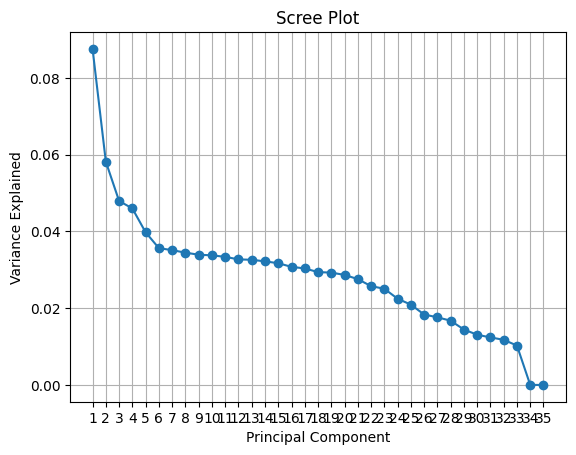

In [44]:
plt.plot(range(1, len(percent_variance_explained) + 1), percent_variance_explained, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(percent_variance_explained) + 1))
plt.grid()
plt.show()


In [49]:
df.shape

(1460, 35)

## Applying PCA object instead of U, Sigma, Vt[SVD]

---



In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=8, random_state=42)
X_pca = pca.fit_transform(df_scaled)
print(type(X_pca))
print(X_pca.shape)

#print("Principal Components (directions of maximum variance):")
#print(pca.components_)
explained_variance = pca.explained_variance_
print("Explained variance: ", explained_variance)
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio of each PC: {explained_variance_ratio}")
cumulative_variance = np.cumsum(explained_variance_ratio)
print(f"Cumulative explained variance: {cumulative_variance}")

<class 'numpy.ndarray'>
(1460, 8)
Explained variance:  [7.16958631 3.16470309 2.14887418 1.97806477 1.4789209  1.18811701
 1.15354341 1.11079304]
Explained variance ratio of each PC: [0.20484532 0.09042009 0.06139641 0.05651614 0.04225488 0.0339462
 0.03295838 0.03173694]
Cumulative explained variance: [0.20484532 0.29526541 0.35666182 0.41317795 0.45543284 0.48937904
 0.52233742 0.55407436]


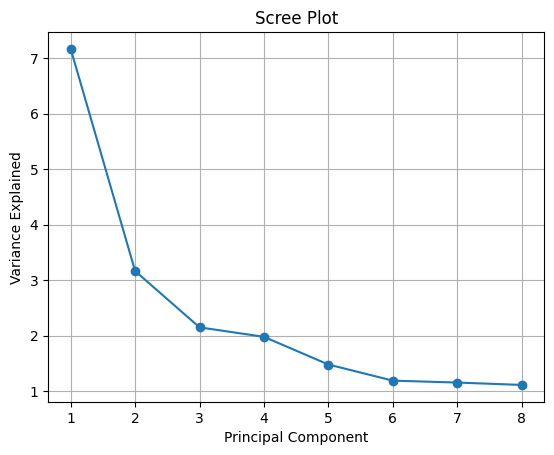

In [78]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()
cumulative_variance = np.cumsum(percent_variance_explained)
print(f"Cumulative explained variance: {cumulative_variance}")

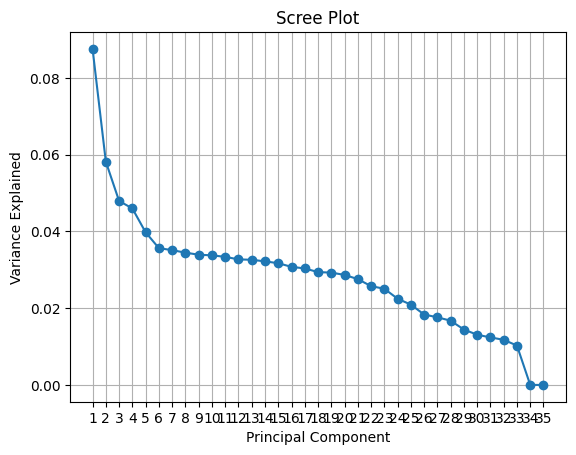

In [83]:
plt.plot(range(1, len(percent_variance_explained) + 1), percent_variance_explained, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(percent_variance_explained) + 1))
plt.grid()
plt.show()


In [1]:
cumulative_variance = np.cumsum(percent_variance_explained)
print(f"Cumulative explained variance: {cumulative_variance}")

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(percent_variance_explained)+1), percent_variance_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.title('Cumulative Plot')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


NameError: name 'np' is not defined